In [1]:
# Install PyTorch and torchvision
!pip install torch torchvision

# Install Detectron2
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

# Install roboflow
!pip install roboflow


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-59td0z44
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-59td0z44
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.0 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp31

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [2]:
import detectron2
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
import detectron2.model_zoo as model_zoo


In [3]:
!pip install roboflow
from roboflow import Roboflow
import os
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

# Initialize Roboflow
rf = Roboflow(api_key="aj1YNkFeRPD8FAf7DMpN")
project = rf.workspace("opticaldisk").project("opticaldisk")
version = project.version(2)
dataset = version.download("coco")

# Print dataset location
print(dataset.location)

# Register your dataset (adjust paths accordingly)
data_path = dataset.location

train_name = "my_unique_dataset_train"
val_name = "my_unique_dataset_val"

# Register the dataset with a unique name
register_coco_instances(train_name, {}, os.path.join(data_path, "train/_annotations.coco.json"), os.path.join(data_path, "train"))
register_coco_instances(val_name, {}, os.path.join(data_path, "valid/_annotations.coco.json"), os.path.join(data_path, "valid"))

# Verify registration
print("Datasets registered successfully!")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Opticaldisk-2 in coco:: 100%|██████████| 878/878 [00:00<00:00, 6573.04it/s]

/content/Opticaldisk-2
Datasets registered successfully!


In [4]:
# Install necessary libraries
!pip install torch torchvision
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'
!pip install roboflow

# Import necessary libraries
import detectron2
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
import detectron2.model_zoo as model_zoo
from roboflow import Roboflow
import os

# Initialize Roboflow and download the dataset
rf = Roboflow(api_key="aj1YNkFeRPD8FAf7DMpN")
project = rf.workspace("opticaldisk").project("opticaldisk")
version = project.version(2)
dataset = version.download("coco")

# Print dataset location to confirm download
print(f"Dataset downloaded to: {dataset.location}")

# Define dataset paths and names
data_path = dataset.location
train_name = "my_unique_dataset_train"
val_name = "my_unique_dataset_val"

# Paths to the annotation files
train_annotation_path = os.path.join(data_path, "train", "_annotations.coco.json")
valid_annotation_path = os.path.join(data_path, "valid", "_annotations.coco.json")

# Properly remove any existing dataset registration
if train_name in DatasetCatalog.list():
    DatasetCatalog.pop(train_name)
    MetadataCatalog.pop(train_name)

if val_name in DatasetCatalog.list():
    DatasetCatalog.pop(val_name)
    MetadataCatalog.pop(val_name)

# Register the datasets
register_coco_instances(train_name, {}, train_annotation_path, os.path.join(data_path, "train"))
register_coco_instances(val_name, {}, valid_annotation_path, os.path.join(data_path, "valid"))

# Verify if the datasets are registered correctly
try:
    train_metadata = MetadataCatalog.get(train_name)
    val_metadata = MetadataCatalog.get(val_name)
    print(f"Datasets '{train_name}' and '{val_name}' registered successfully!")
except KeyError as e:
    print(f"Error: {e}")
    print("Ensure that the datasets are registered correctly and the paths are accurate.")
    exit(1)


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-eppoj7hp
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-eppoj7hp
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to: /content/Opticaldisk-2
Datasets 'my_unique_dataset_train' and 'my_unique_dataset_val' registered successfully!


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Files in dataset directory:
['valid', 'test', 'train', 'README.dataset.txt', 'README.roboflow.txt']
Expected train annotation path: /content/Opticaldisk-2/train/_annotations.coco.json
Expected valid annotation path: /content/Opticaldisk-2/valid/_annotations.coco.json
Datasets registered successfully!


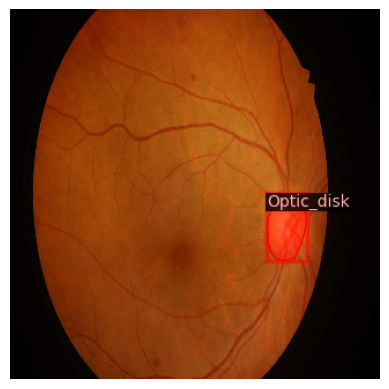

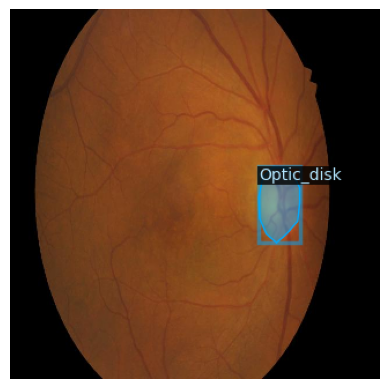

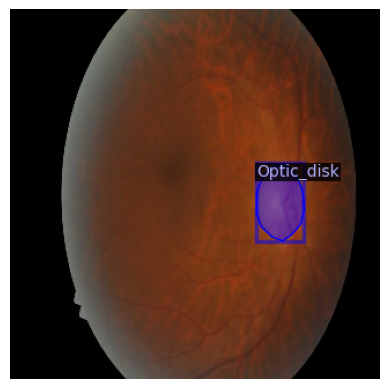

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import random

# Define the dataset location (update this if necessary)
data_path = "/content/Opticaldisk-2"  # Update if the location is different after downloading

# Check the directory structure
print("Files in dataset directory:")
print(os.listdir(data_path))

# Check paths of training and validation annotation files
train_annotation_path = os.path.join(data_path, "train", "_annotations.coco.json")
valid_annotation_path = os.path.join(data_path, "valid", "_annotations.coco.json")

# Confirm that the annotation files exist
if not os.path.exists(train_annotation_path):
    print(f"Training annotation file not found: {train_annotation_path}")

if not os.path.exists(valid_annotation_path):
    print(f"Validation annotation file not found: {valid_annotation_path}")

# Verify the correct paths during registration
print(f"Expected train annotation path: {train_annotation_path}")
print(f"Expected valid annotation path: {valid_annotation_path}")

# Check if the dataset is already registered; if so, remove and re-register
train_name = "my_dataset_train"
val_name = "my_dataset_val"

# Remove previously registered datasets if they exist
if train_name in DatasetCatalog.list():
    DatasetCatalog.pop(train_name)
    MetadataCatalog.pop(train_name)

if val_name in DatasetCatalog.list():
    DatasetCatalog.pop(val_name)
    MetadataCatalog.pop(val_name)

# Register the datasets with correct paths
register_coco_instances(train_name, {}, train_annotation_path, os.path.join(data_path, "train"))
register_coco_instances(val_name, {}, valid_annotation_path, os.path.join(data_path, "valid"))

# Verify if the datasets are registered correctly
print("Datasets registered successfully!")

# Get metadata and dataset dicts
metadata = MetadataCatalog.get(train_name)
dataset_dicts = DatasetCatalog.get(train_name)

# Visualize some samples from the dataset
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Visualize with the corrected image
    visualizer = Visualizer(img_rgb, metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    # Display the image
    plt.imshow(vis.get_image())
    plt.axis('off')  # Hide the axes
    plt.show()
